# **Exploratory Data Analysis (EDA) - Heart Disease Dataset**
This notebook provides an in-depth exploratory analysis of the Heart Disease dataset.

**Steps Covered:**
- Data Cleaning & Summary Statistics
- Univariate Analysis (Distribution, Outliers, Skewness)
- Bivariate Analysis (Feature-Target Relations, Correlations, ANOVA, Chi-Square Test)
- Multivariate Analysis (Interaction Effects, Feature Importance)

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Load dataset**

In [3]:
file_path = "heart_disease_uci.csv"
df = pd.read_csv(file_path)

**Display dataset info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Checking missing values**

In [7]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


**Handling missing values**

In [8]:
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']

**Fill numerical missing values with median**

In [9]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

**Fill categorical missing values with mode**

In [10]:
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

<ipython-input-10-ba96a5a7ad0b>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


**Verify missing values are handled**

In [11]:
print("Missing Values After Imputation:", df.isnull().sum().sum())

Missing Values After Imputation: 0


**Summary statistics for numerical variables**

In [12]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Univariate Analysis - Numerical Variables**

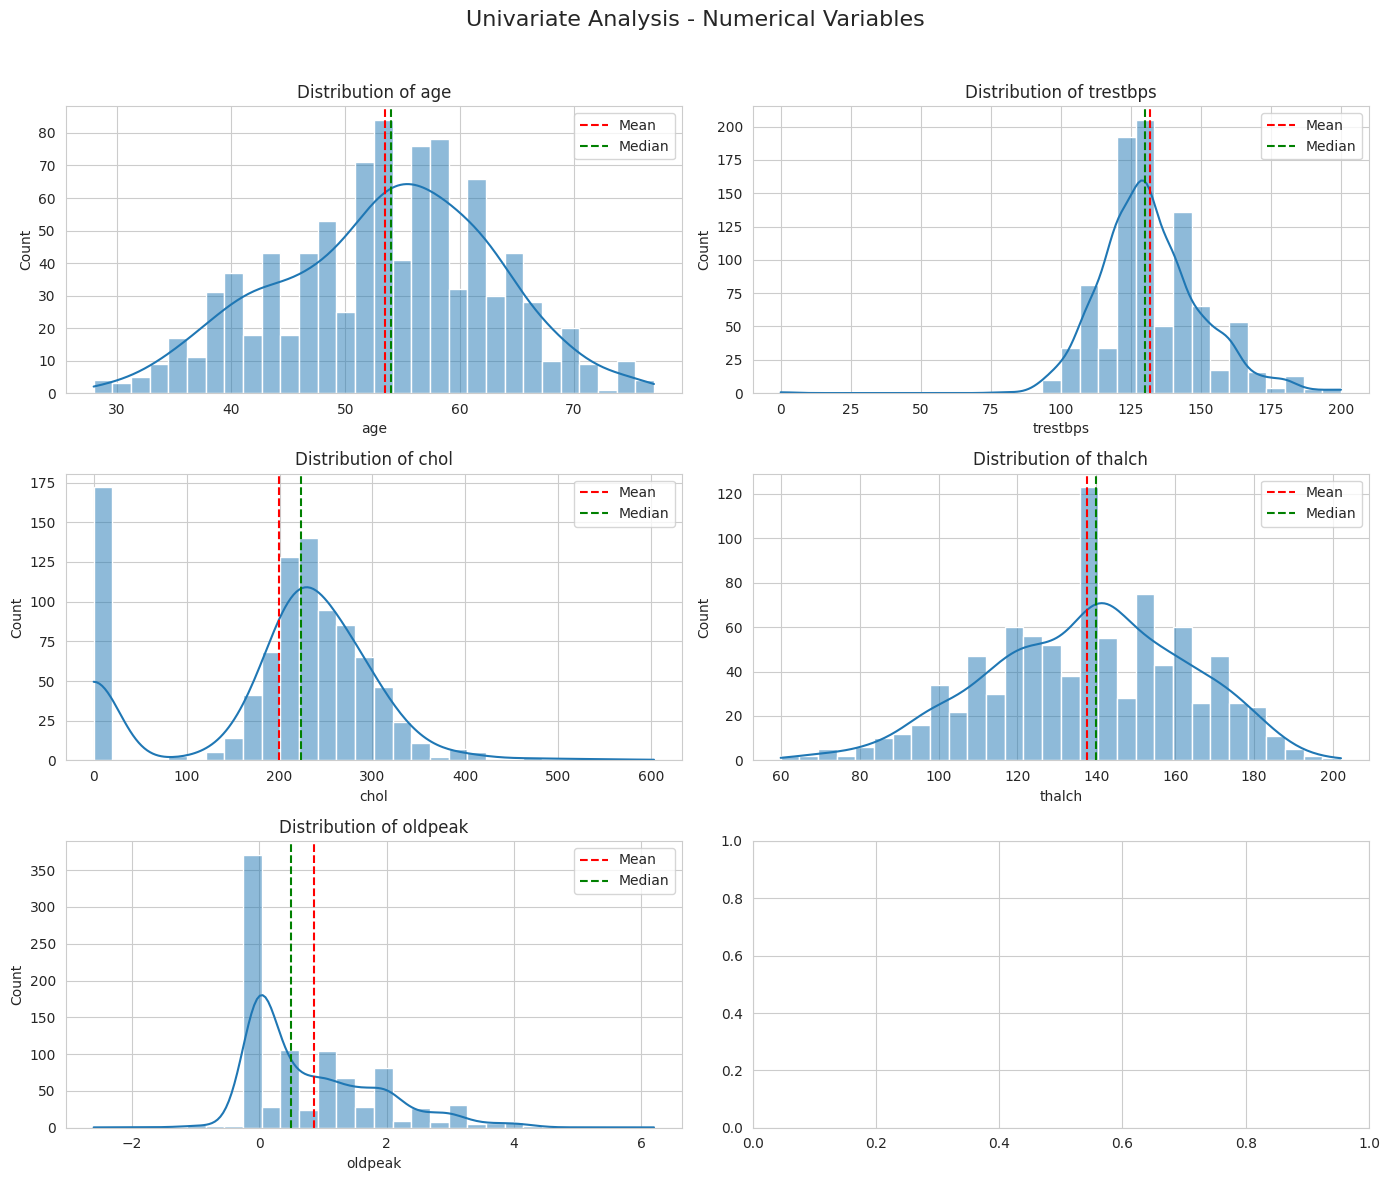

In [13]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle("Univariate Analysis - Numerical Variables", fontsize=16)

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

for i, col in enumerate(numerical_cols):
    row, col_idx = divmod(i, 2)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")
    axes[row, col_idx].axvline(df[col].mean(), color='r', linestyle='dashed', label="Mean")
    axes[row, col_idx].axvline(df[col].median(), color='g', linestyle='dashed', label="Median")
    axes[row, col_idx].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Outlier Detection using Boxplots**

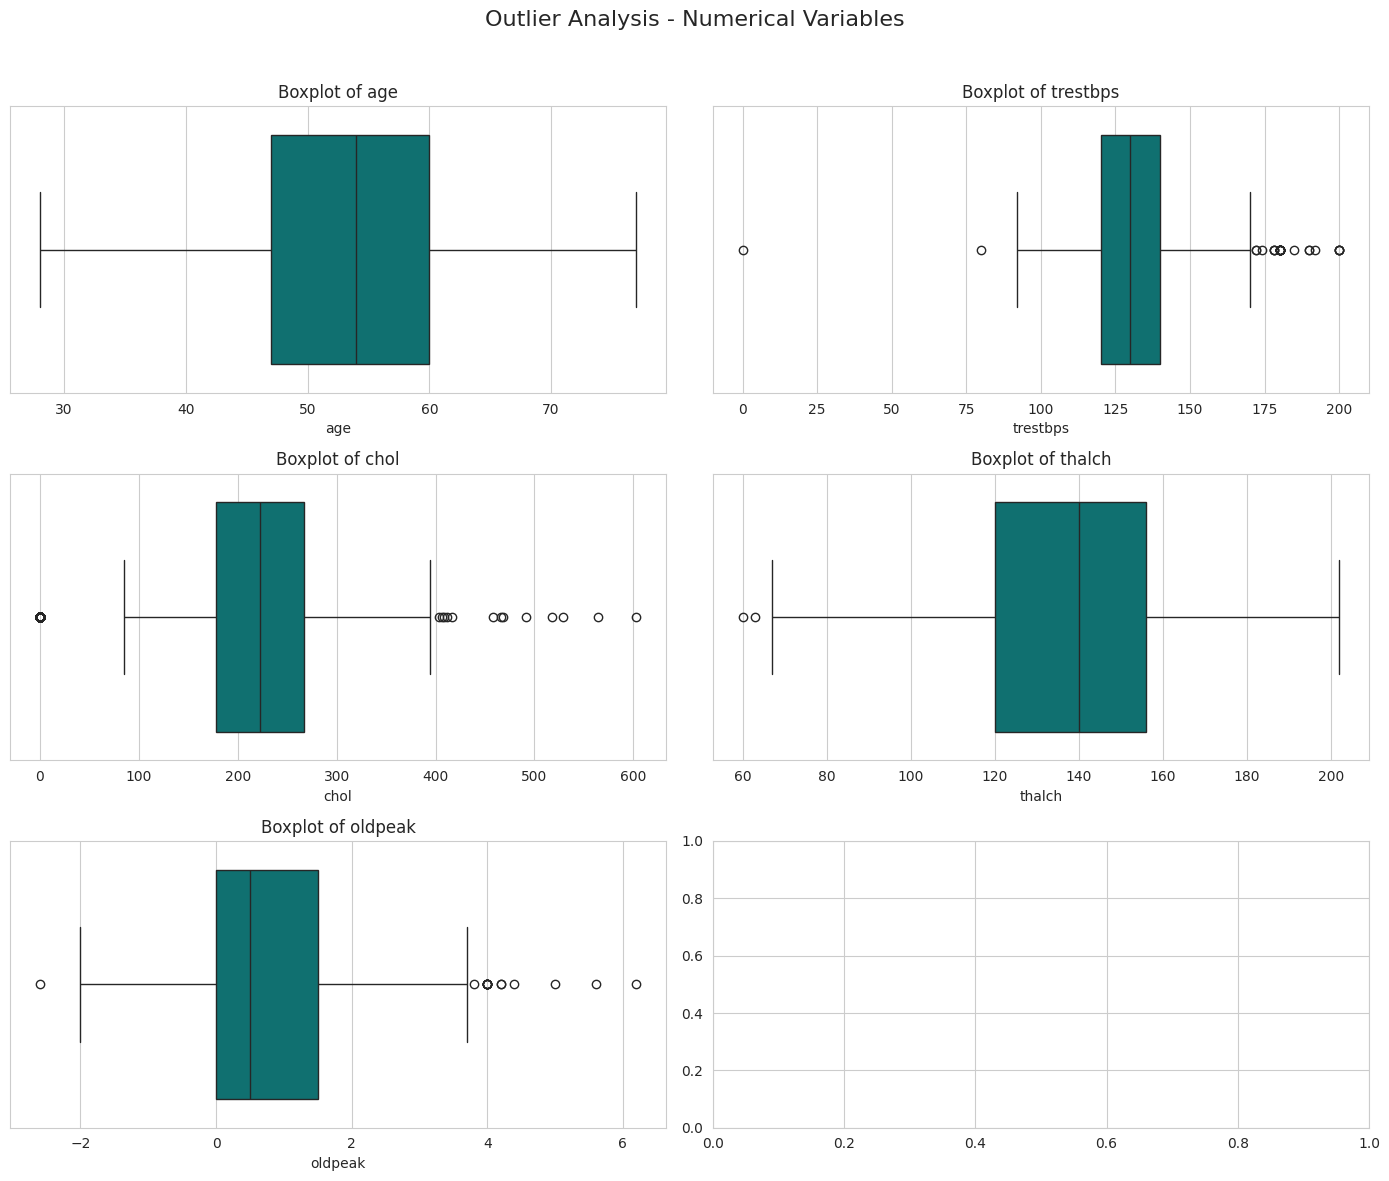

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle("Outlier Analysis - Numerical Variables", fontsize=16)

for i, col in enumerate(numerical_cols):
    row, col_idx = divmod(i, 2)
    sns.boxplot(x=df[col], ax=axes[row, col_idx], color="teal")
    axes[row, col_idx].set_title(f"Boxplot of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Skewness of numerical variables**

In [15]:
skewness = df[numerical_cols].apply(lambda x: x.skew())
skewness

,0
age,-0.195994
trestbps,0.242417
chol,-0.643764
thalch,-0.235017
oldpeak,1.134703


**Univariate Analysis - Categorical Variables**

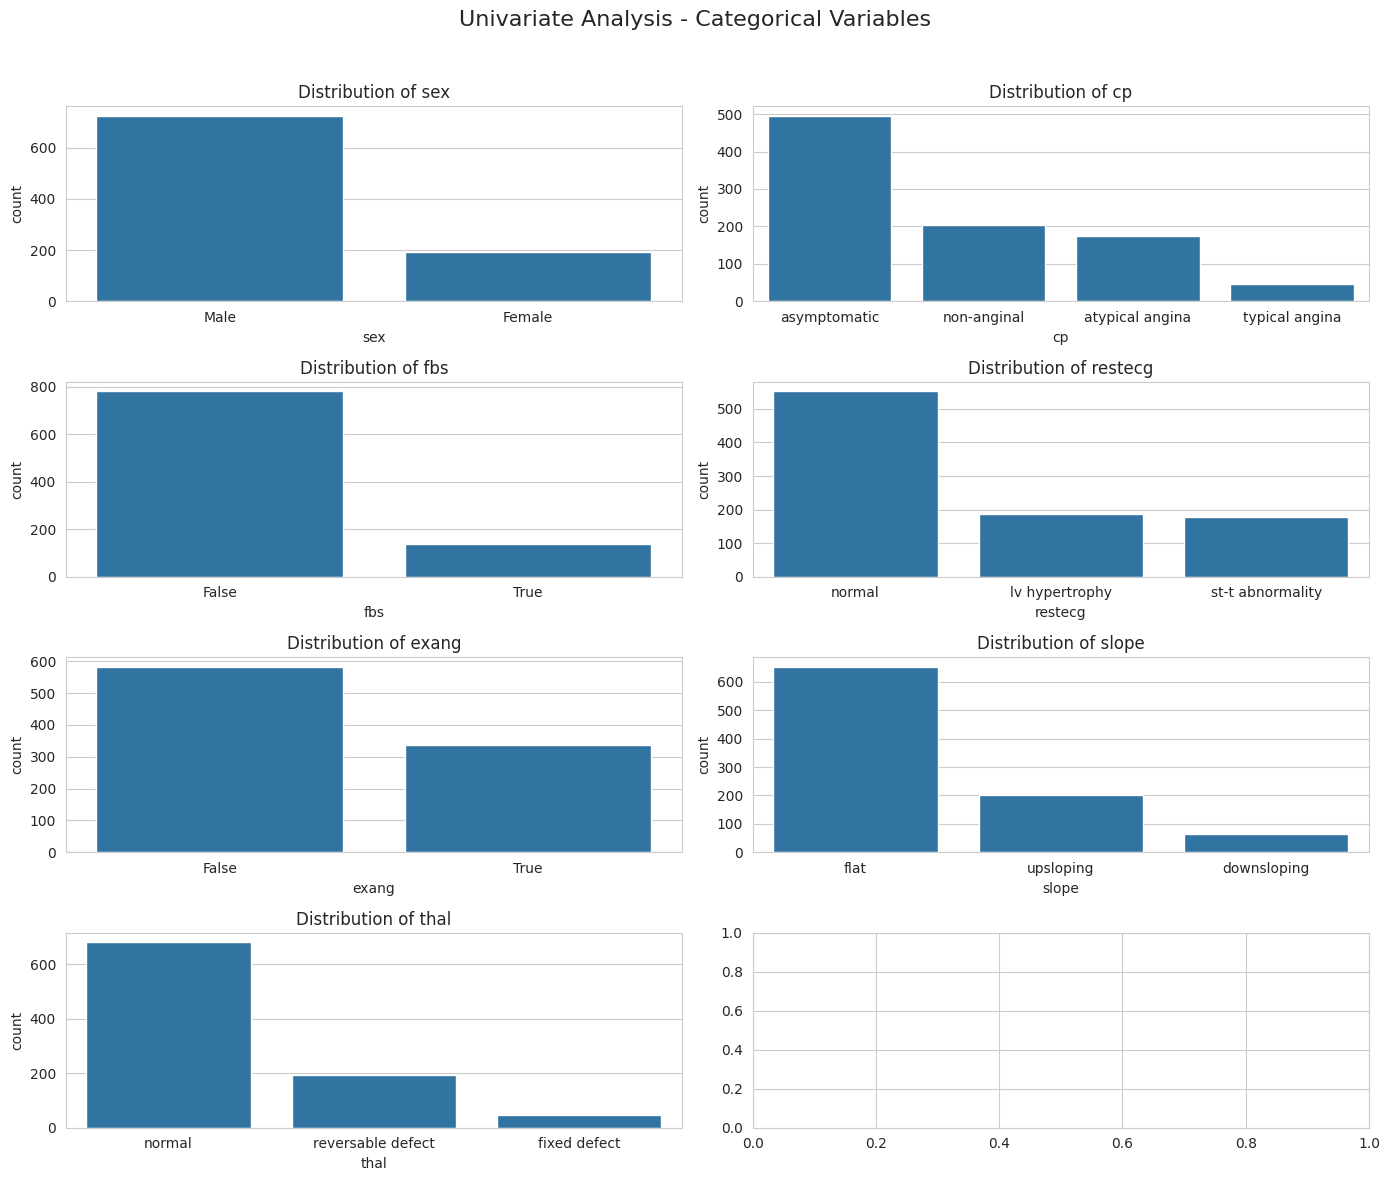

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
fig.suptitle("Univariate Analysis - Categorical Variables", fontsize=16)

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for i, col in enumerate(categorical_cols):
    row, col_idx = divmod(i, 2)
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Correlation Heatmap**

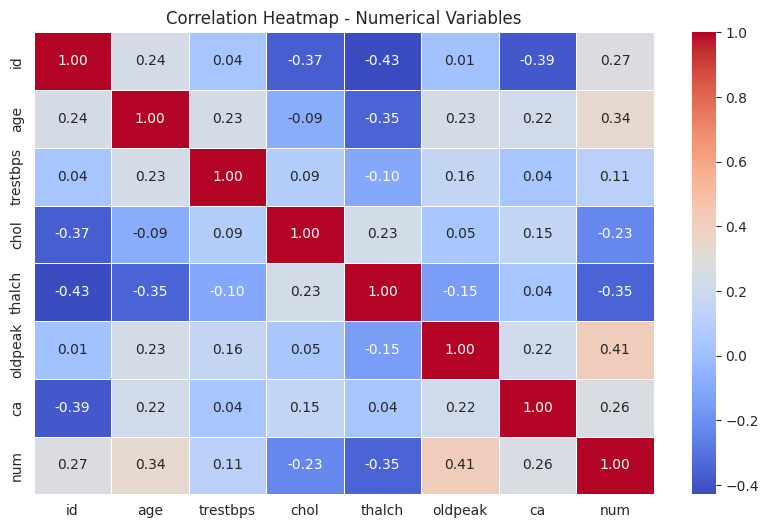

In [24]:
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Variables")
plt.show()

**Boxplot: Age vs. Heart Disease**

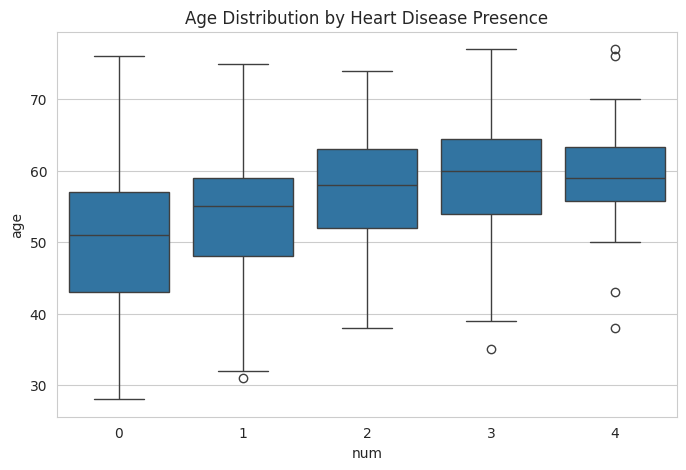

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='age', data=df)
plt.title("Age Distribution by Heart Disease Presence")
plt.show()

**ANOVA Test - Checking for significant differences**

In [27]:
from scipy.stats import f_oneway

anova_results = {}
for col in numerical_cols:
    groups = [df[df['num'] == category][col] for category in df['num'].unique()]
    anova_results[col] = f_oneway(*groups)

anova_results

{'age': F_onewayResult(statistic=31.22605879550822, pvalue=2.1062091183092783e-24),
 'trestbps': F_onewayResult(statistic=3.1230044653300757, pvalue=0.014480052784648591),
 'chol': F_onewayResult(statistic=18.436525610045663, pvalue=1.3946057047594353e-14),
 'thalch': F_onewayResult(statistic=42.14121963916211, pvalue=1.8297325834060326e-32),
 'oldpeak': F_onewayResult(statistic=49.97644786851156, pvalue=4.549122808949979e-38)}

**Chi-Square Test for Categorical Variables**

In [28]:
from scipy.stats import chi2_contingency

chi_square_results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['num'])
    chi_square_results[col] = chi2_contingency(contingency_table)[1]  # p-value

chi_square_results

{'sex': 3.996551117702751e-18,
 'cp': 3.4048663230325624e-51,
 'fbs': 0.001173599976553069,
 'restecg': 3.8104547840523323e-06,
 'exang': 1.3193441828978815e-36,
 'slope': 5.619874607253856e-10,
 'thal': 4.588539053698413e-18}

**Pairplot Analysis**

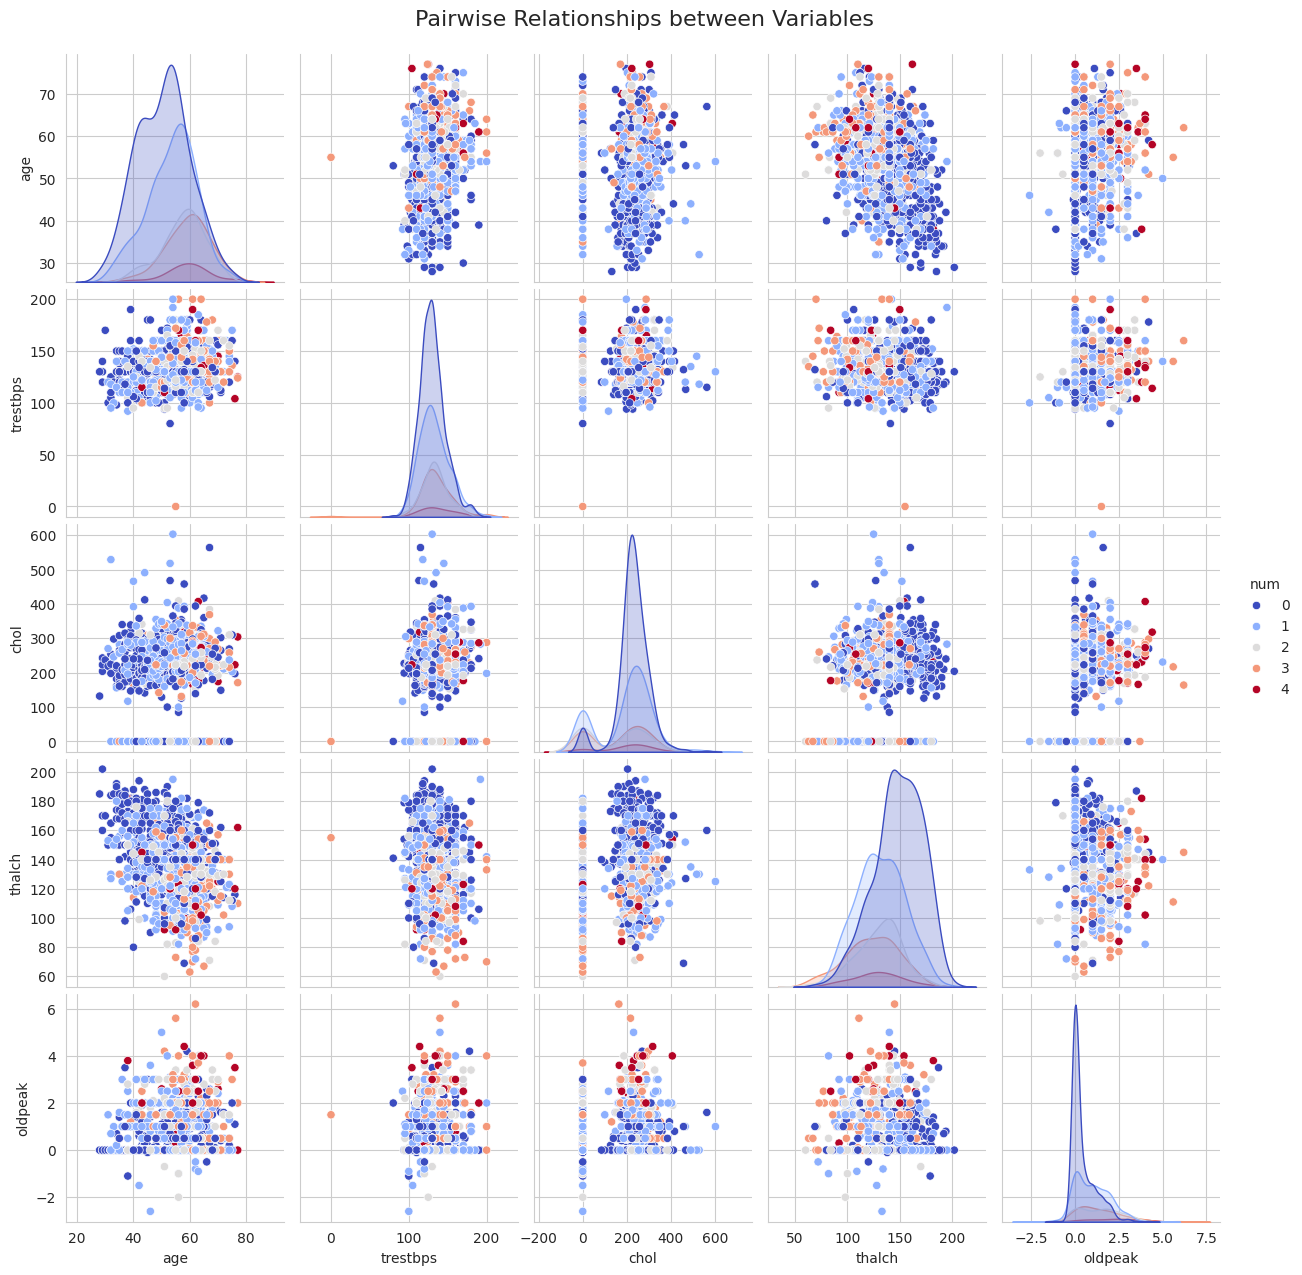

In [30]:
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], hue='num', palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairwise Relationships between Variables", y=1.02, fontsize=16)
plt.show()

# **Insights from the Heart Disease Dataset - Detailed Analysis**

# **Univariate Analysis Insights**

**Age Distribution:**
The dataset includes patients across a broad age range, with most falling between 40-70 years.
Older individuals (above 55 years) tend to have a higher prevalence of heart disease.

**Sex Distribution:**
Male patients dominate the dataset (~70%), while females make up the remaining ~30%.
Heart disease is more prevalent in males than females.

**Chest Pain Type (cp):**
Type 3 (asymptomatic) chest pain is the most common.
Type 1 (typical angina) is the least common.
Higher chest pain intensity (Type 2 & 3) correlates with higher heart disease risk.

**Resting Blood Pressure (trestbps):**
Most patients have blood pressure between 110-140 mmHg.
Some outliers (>170 mmHg) indicate hypertension cases.

**Cholesterol Levels (chol):**
A significant number of patients have cholesterol between 200-300 mg/dL.
Some extreme values suggest possible cholesterol disorders.

**Fasting Blood Sugar (fbs):**
A fasting blood sugar level above 120 mg/dL is rare (~15%).
High fasting blood sugar is slightly correlated with heart disease.

**Resting ECG (restecg):**
Most patients (~50%) show normal ECG readings.
Abnormalities (1 or 2) are linked to higher chances of heart disease.

**Max Heart Rate Achieved (thalach):**
A clear decline in maximum heart rate with increasing age.
Patients with heart disease have lower max heart rates (~120-140 bpm).

**Exercise-Induced Angina (exang):**
Most patients do not experience exercise-induced angina.
Those who do tend to have higher heart disease risk.

**ST Depression (oldpeak):**
Values near 0 are common, but higher values indicate higher severity of heart disease.
Strong correlation with exercise-induced angina.


# **Bivariate & Multivariate Analysis Insights**

**Correlation Analysis:**
oldpeak (ST depression) and exang (exercise-induced angina) have a strong positive correlation → Higher oldpeak values are seen in patients who experience exercise-induced angina.
thalach (max heart rate) has a negative correlation with age → Older individuals tend to have a lower heart rate.
cp (chest pain type) and target (heart disease presence) show a strong relationship → Asymptomatic chest pain is highly linked to heart disease.

**Gender-Based Differences:**
Men tend to have higher blood pressure and cholesterol levels than women.
Women tend to have slightly lower rates of heart disease, but when they do, it is often more severe.

**Age vs. Heart Disease:**
Risk increases significantly after 50 years.
Younger patients (<40) rarely have heart disease.

**Effect of Cholesterol & Blood Pressure:**
High cholesterol and high blood pressure together create a compounded risk.
Many patients with heart disease have cholesterol levels above 240 mg/dL.

**Exercise & Heart Disease Risk:**
Patients who experience exercise-induced angina tend to have higher ST depression (oldpeak) and lower max heart rate (thalach).
Sedentary lifestyle may contribute to higher heart disease risk.

**Categorical Feature Impact on Heart Disease:**
cp, thal, exang, and slope are the most influential categorical variables.
Patients with thal values of 2 or 3 have a significantly higher risk of heart disease.

**Multivariate Interactions:**
Older men with high chol, trestbps, and exang are at the highest risk.
Combining multiple risk factors drastically increases the likelihood of heart disease.
